<a href="https://colab.research.google.com/github/ashirm1999/SML-Project/blob/main/Simran_Goindani_Ashir_Mehta_DS5220_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import keras
from keras.datasets import cifar10
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.metrics as skm
from sklearn import svm
import os, time
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

## Model Development

### SVM with different Kernel

#### Loading Data

In [2]:
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_val = x_train[49000:, :].astype(np.float)
y_val = np.squeeze(y_train[49000:, :])
x_train = x_train[:49000, :].astype(np.float)
y_train = np.squeeze(y_train[:49000, :])
y_test = np.squeeze(y_test)
x_test = x_test.astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarnin

In [4]:
print("Train image shape " , x_train.shape)
print("Train label shape :", y_train.shape)
print("Validate image shape :", x_val.shape)
print("Validate label shape : ", y_val.shape)
print("Test image shape : ", x_test.shape)
print("Test label shape : ", y_test.shape)

Train image shape  (49000, 32, 32, 3)
Train label shape : (49000,)
Validate image shape : (1000, 32, 32, 3)
Validate label shape :  (1000,)
Test image shape :  (10000, 32, 32, 3)
Test label shape :  (10000,)


#### Reshaping and Normalizing Data

In [5]:
print(x_train.shape)
print(y_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0], -1)) 
x_val = np.reshape(x_val, (x_val.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

#Normalizing
x_train = ((x_train / 255) * 2) - 1 

(49000, 32, 32, 3)
(49000,)


In [6]:
#Selecting a smaller subset of data
x_train = x_train[:3000,:]
y_train = y_train[:3000]
print(y_train)
print(x_train.shape)
print(y_train.shape)

[6 9 9 ... 6 6 4]
(3000, 3072)
(3000,)


#### SVM Model

In [7]:
def svm_models_acc(model, x_test, y_test):
  
  return np.mean(model.predict(x_test) == y_test)

In [8]:
def svm_models(x_train, y_train, x_val, y_val, x_test, y_test, kernel, c):
  train_acc, val_acc = [], []

  if kernel == "rbf":
    for i in c:
      svm_model = svm.SVC(probability = False, kernel = kernel, C = i, gamma = 'auto')
      svm_model.fit(x_train, y_train)

      ypred_train = svm_model.predict(x_train)
      acc_train = np.mean(ypred_train == y_train)
      train_acc.append(acc_train)

      ypred_test = svm_model.predict(x_val)
      acc_test = np.mean(ypred_test == y_val)
      val_acc.append(acc_test)

      if i == 1:
        test_acc = svm_models_acc(svm_model, x_test, y_test)

    plt.plot(c, train_acc,'.-',color = 'red')
    plt.plot(c, val_acc,'.-',color = 'orange')
    plt.xlabel('c')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs c for training and test data with " + str(kernel) + " kernel")
    plt.legend(["train", "val"])
    plt.grid()
    plt.show()

    return test_acc

  elif kernel == 'No kernel':
    for i in c:
      svm_model = svm.SVC(probability = False, C = i)
      svm_model.fit(x_train, y_train)

      ypred_train = svm_model.predict(x_train)
      acc_train = np.mean(ypred_train == y_train)
      train_acc.append(acc_train)

      ypred_test = svm_model.predict(x_val)
      acc_test = np.mean(ypred_test == y_val)
      val_acc.append(acc_test)

      if i == 1:
        test_acc = svm_models_acc(svm_model, x_test, y_test)

    plt.plot(c, train_acc,'.-',color = 'red')
    plt.plot(c, val_acc,'.-',color = 'orange')
    plt.xlabel('c')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs c for training and test data without kernel")
    plt.legend(["train", "val"])
    plt.grid()
    plt.show()

    return test_acc

  else:

    for i in c:
      svm_model = svm.SVC(probability = False, kernel = kernel, C = i)
      svm_model.fit(x_train, y_train)

      ypred_train = svm_model.predict(x_train)
      acc_train = np.mean(ypred_train == y_train)
      train_acc.append(acc_train)

      ypred_test = svm_model.predict(x_val)
      acc_test = np.mean(ypred_test == y_val)
      val_acc.append(acc_test)

      if i == 1:
        test_acc = svm_models_acc(svm_model, x_test, y_test)

    plt.plot(c, train_acc, '.-', color = 'red')
    plt.plot(c, val_acc, '.-', color = 'orange')
    plt.xlabel('c')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs c for training and test data with " + str(kernel) + " kernel")
    plt.legend(["train", "val"])
    plt.grid()
    plt.show()

    return test_acc

#### Model - 1 SVM without Kernel

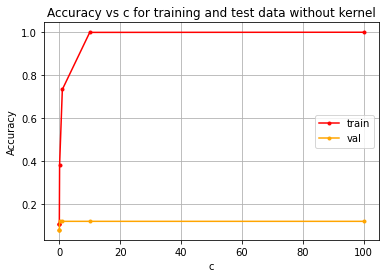

In [9]:
c_svm = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
test_acc_svm = svm_models(x_train, y_train, x_val, y_val, x_test, y_test, 'No kernel', c_svm)

#### Model - 2 SVM with Linear Kernel

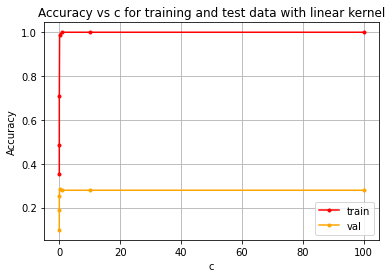

In [10]:
c_svm_linear = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
test_acc_linear = svm_models(x_train, y_train, x_val, y_val, x_test, y_test, 'linear', c_svm_linear)

#### Model - 3 SVM with Polynomial Kernel

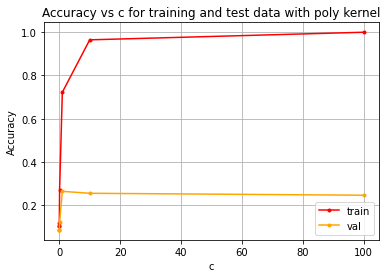

In [11]:
c_svm_poly = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
test_acc_poly = svm_models(x_train, y_train, x_val, y_val, x_test, y_test, 'poly', c_svm_poly)

#### Model - 4 SVM with RBF Kernel

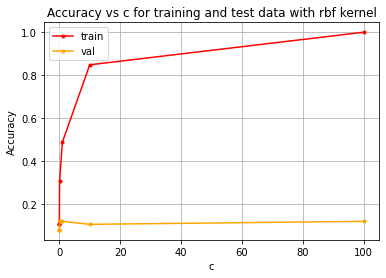

In [12]:
c_svm_rbf = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
test_acc_rbf = svm_models(x_train, y_train, x_val, y_val, x_test, y_test, 'rbf', c_svm_poly)

### Model - 5 DNN without CNN

In [13]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

print()
print('Training Data shape:', x_train.shape)
print("Number of Training Samples", x_train.shape[0])
print("Number of Testing Samples", x_test.shape[0])

# Converting to Categorical Classes
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


Training Data shape: (50000, 32, 32, 3)
Number of Training Samples 50000
Number of Testing Samples 10000


#### Pre - Processing

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42) 

In [15]:
print("Number of Training Samples", x_train.shape[0])
print("Number of Validation Samples", x_val.shape[0])
print("Number of Testing Samples", x_test.shape[0])

Number of Training Samples 37500
Number of Validation Samples 12500
Number of Testing Samples 10000


In [16]:
X_train_scaled = x_train / 255
X_val_scaled = x_val / 255
X_test_scaled = x_test / 255

In [17]:
# Creating Neural Network without CNN
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (32, 32, 3)),
        keras.layers.Dense(3000, activation = 'relu'),
        keras.layers.Dense(1000, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ])

model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = model.fit(X_train_scaled, y_train, epochs = 25, validation_data = (X_val_scaled, y_val))

Epoch 1/25
1172/1172 [==============================] - 13s 11ms/step - loss: 1.8484 - accuracy: 0.3418 - val_loss: 1.7080 - val_accuracy: 0.3872
Epoch 2/25
1172/1172 [==============================] - 11s 9ms/step - loss: 1.6600 - accuracy: 0.4148 - val_loss: 1.6332 - val_accuracy: 0.4242
Epoch 3/25
1172/1172 [==============================] - 10s 9ms/step - loss: 1.5758 - accuracy: 0.4444 - val_loss: 1.5649 - val_accuracy: 0.4462
Epoch 4/25
1172/1172 [==============================] - 12s 10ms/step - loss: 1.5208 - accuracy: 0.4633 - val_loss: 1.5327 - val_accuracy: 0.4602
Epoch 5/25
1172/1172 [==============================] - 11s 10ms/step - loss: 1.4678 - accuracy: 0.4833 - val_loss: 1.5805 - val_accuracy: 0.4262
Epoch 6/25
1172/1172 [==============================] - 12s 10ms/step - loss: 1.4291 - accuracy: 0.4995 - val_loss: 1.5367 - val_accuracy: 0.4416
Epoch 7/25
1172/1172 [==============================] - 11s 10ms/step - loss: 1.3897 - accuracy: 0.5085 - val_loss: 1.4818 - v

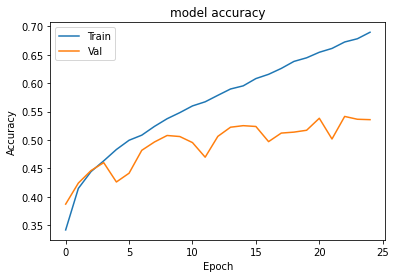

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

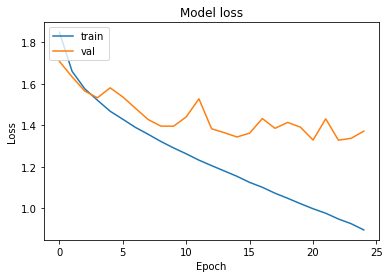

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [21]:
test_loss_wo_cnn, test_accuracy_wo_cnn = model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.3634 - accuracy: 0.5329


### Model - 6 DNN with CNN

In [22]:
import tensorflow as tf

In [23]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

print()
print('Training Data shape:', x_train.shape)
print("Number of Training Samples", x_train.shape[0])
print("Number of Testing Samples", x_test.shape[0])


Training Data shape: (50000, 32, 32, 3)
Number of Training Samples 50000
Number of Testing Samples 10000


In [24]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42) 

In [25]:
X_train_scaled = x_train / 255
X_val_scaled = x_val / 255
X_test_scaled = x_test / 255

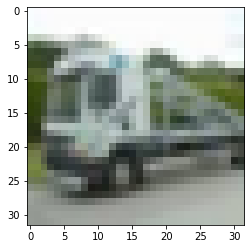

In [26]:
plt.imshow(x_test[217])

In [27]:
model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
model_cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
model_cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
model_cnn.add(tf.keras.layers.Dense(units = 128,activation='relu'))
model_cnn.add(tf.keras.layers.Dense(units = 10,activation='softmax'))

In [28]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [29]:
model_cnn.compile(loss = "sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [30]:
history1 = model_cnn.fit(X_train_scaled, y_train, epochs = 25, validation_data = (X_val_scaled, y_val))

Epoch 1/25
1172/1172 [==============================] - 19s 15ms/step - loss: 1.5296 - sparse_categorical_accuracy: 0.4411 - val_loss: 1.1728 - val_sparse_categorical_accuracy: 0.5839
Epoch 2/25
1172/1172 [==============================] - 16s 14ms/step - loss: 1.1121 - sparse_categorical_accuracy: 0.6032 - val_loss: 0.9809 - val_sparse_categorical_accuracy: 0.6509
Epoch 3/25
1172/1172 [==============================] - 16s 14ms/step - loss: 0.9407 - sparse_categorical_accuracy: 0.6663 - val_loss: 0.8831 - val_sparse_categorical_accuracy: 0.6876
Epoch 4/25
1172/1172 [==============================] - 17s 14ms/step - loss: 0.8380 - sparse_categorical_accuracy: 0.7030 - val_loss: 0.8297 - val_sparse_categorical_accuracy: 0.7095
Epoch 5/25
1172/1172 [==============================] - 17s 14ms/step - loss: 0.7645 - sparse_categorical_accuracy: 0.7301 - val_loss: 0.7456 - val_sparse_categorical_accuracy: 0.7370
Epoch 6/25
1172/1172 [==============================] - 17s 14ms/step - loss: 0.

In [31]:
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.7767 - sparse_categorical_accuracy: 0.7702


# Model Evalution

In [32]:
df = pd.DataFrame()

In [33]:
df['Model Name'] = ['SVM without Kernel', 'SVM With Linear Kernel', 'SVM With Poly Kernel', 'SVM With RBF Kernel', 'Neural Network without CNN', 'Neural Network with CNN']

In [34]:
df['Test Accuracy'] = [test_acc_svm * 100, test_acc_linear * 100, test_acc_poly * 100, test_acc_rbf * 100, test_accuracy_wo_cnn * 100,  test_accuracy_cnn * 100 ]

In [35]:
df

,Model Name,Test Accuracy
0,SVM without Kernel,10.000000
1,SVM With Linear Kernel,26.090000
2,SVM With Poly Kernel,25.560000
3,SVM With RBF Kernel,10.000000
4,Neural Network without CNN,53.289998
5,Neural Network with CNN,77.020001
